# Goal: Level 04 EDA

In [51]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [52]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [53]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-04\data2\lev_04_mp_clean.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Meals_Served_to_Non_HH_Members', Int32),
        ('Ceremony_Performed_Last_30_Days', Int32),
        ('Online_Groceries', Int32),
        ('Online_Milk', Int32),
        ('Online_Vegetables', Int32),
        ('Online_Fresh_Fruits', Int32),
        ('Online_Dry_Fruits', Int32),
        ('Online_Egg_Fish_Meat', Int32),
        ('Online_Served_Processed_Food', Int32),
        ('Online_Packed_Processed_Food', Int32),
        ('Online_Other_Food_Items', Int32),
        ('Ration_Any_Item_Last_30_Days', Int32),
        ('Ration_Rice', Int32),
        ('Ration_Wheat', Int32),
        ('Ration_Coarse_Grain', Int32),
        ('Ration_Sugar', Int32),
        ('Ration_Pulses', Int32),
        ('Ration_Edible_Oil', Int32),
        ('Ration_Other_Food_Items', Int32)])

In [54]:
col_list = pdf.columns

# Functions

In [55]:
def draw_pie(col: str) -> None:
    df = pdf[col].value_counts().to_pandas()
    display(df)

    plt.pie(
        df['count'],
        labels=df[col],
        autopct='%1.2f%%'
    )
    plt.title(f"{col} Percentage")
    plt.show()
    print({'=='*45})

# 1. Basic Descriptive Analysis

## How many households received any ration item in the last 30 days?


,Ration_Any_Item_Last_30_Days,count
0,2,15510
1,1,26805


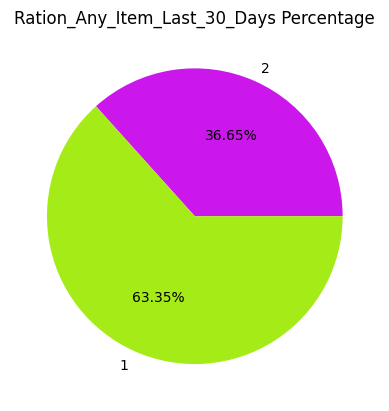

{'=========================================================================================='}


In [56]:
draw_pie('Ration_Any_Item_Last_30_Days')

## What percentage of households bought online groceries?

,Online_Groceries,count
0,1,1299
1,0,41016


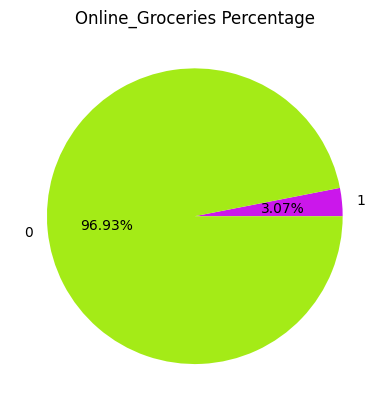

{'=========================================================================================='}


In [57]:
draw_pie('Online_Groceries')

## What’s the average quantity (or count) of Ration_Rice, Ration_Wheat, etc. distributed per household?

In [58]:
ration_col = []
for col in col_list:
    if col.startswith('Ration_'):
        ration_col.append(col)
    
ration_col

['Ration_Any_Item_Last_30_Days',
 'Ration_Rice',
 'Ration_Wheat',
 'Ration_Coarse_Grain',
 'Ration_Sugar',
 'Ration_Pulses',
 'Ration_Edible_Oil',
 'Ration_Other_Food_Items']

In [59]:
online_col = []

for col in col_list:
    if col.startswith('Online_'):
        online_col.append(col)
        
online_col

['Online_Groceries',
 'Online_Milk',
 'Online_Vegetables',
 'Online_Fresh_Fruits',
 'Online_Dry_Fruits',
 'Online_Egg_Fish_Meat',
 'Online_Served_Processed_Food',
 'Online_Packed_Processed_Food',
 'Online_Other_Food_Items']

In [99]:
pdf[online_col].describe().to_pandas().T

,0,1,2,3,4,5,6,7,8
statistic,count,null_count,mean,std,min,25%,50%,75%,max
Online_Groceries,42315.0,0.0,0.030698,0.172501,0.0,0.0,0.0,0.0,1.0
Online_Milk,42315.0,0.0,0.007373,0.085552,0.0,0.0,0.0,0.0,1.0
Online_Vegetables,42315.0,0.0,0.010422,0.101555,0.0,0.0,0.0,0.0,1.0
Online_Fresh_Fruits,42315.0,0.0,0.009429,0.096647,0.0,0.0,0.0,0.0,1.0
Online_Dry_Fruits,42315.0,0.0,0.007231,0.084731,0.0,0.0,0.0,0.0,1.0
Online_Egg_Fish_Meat,42315.0,0.0,0.001347,0.036678,0.0,0.0,0.0,0.0,1.0
Online_Served_Processed_Food,42315.0,0.0,0.007161,0.084318,0.0,0.0,0.0,0.0,1.0
Online_Packed_Processed_Food,42315.0,0.0,0.013329,0.114679,0.0,0.0,0.0,0.0,1.0
Online_Other_Food_Items,42315.0,0.0,0.004467,0.066683,0.0,0.0,0.0,0.0,1.0


In [60]:
print('Ration Summary')
pdf[ration_col].describe().to_pandas().T

Ration Summary


,0,1,2,3,4,5,6,7,8
statistic,count,null_count,mean,std,min,25%,50%,75%,max
Ration_Any_Item_Last_30_Days,42315.0,0.0,1.366537,0.481864,1.0,1.0,1.0,2.0,2.0
Ration_Rice,42315.0,0.0,0.631549,0.48239,0.0,0.0,1.0,1.0,1.0
Ration_Wheat,42315.0,0.0,0.626941,0.483623,0.0,0.0,1.0,1.0,1.0
Ration_Coarse_Grain,42315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ration_Sugar,42315.0,0.0,0.017441,0.130908,0.0,0.0,0.0,0.0,1.0
Ration_Pulses,42315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ration_Edible_Oil,42315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ration_Other_Food_Items,42315.0,0.0,0.580007,0.493563,0.0,0.0,1.0,1.0,1.0


In [61]:
print('Online Summary')
pdf[online_col].describe().to_pandas().T

Online Summary


,0,1,2,3,4,5,6,7,8
statistic,count,null_count,mean,std,min,25%,50%,75%,max
Online_Groceries,42315.0,0.0,0.030698,0.172501,0.0,0.0,0.0,0.0,1.0
Online_Milk,42315.0,0.0,0.007373,0.085552,0.0,0.0,0.0,0.0,1.0
Online_Vegetables,42315.0,0.0,0.010422,0.101555,0.0,0.0,0.0,0.0,1.0
Online_Fresh_Fruits,42315.0,0.0,0.009429,0.096647,0.0,0.0,0.0,0.0,1.0
Online_Dry_Fruits,42315.0,0.0,0.007231,0.084731,0.0,0.0,0.0,0.0,1.0
Online_Egg_Fish_Meat,42315.0,0.0,0.001347,0.036678,0.0,0.0,0.0,0.0,1.0
Online_Served_Processed_Food,42315.0,0.0,0.007161,0.084318,0.0,0.0,0.0,0.0,1.0
Online_Packed_Processed_Food,42315.0,0.0,0.013329,0.114679,0.0,0.0,0.0,0.0,1.0
Online_Other_Food_Items,42315.0,0.0,0.004467,0.066683,0.0,0.0,0.0,0.0,1.0


## How many households performed a Ceremony_Last_30_Days = 1?


,Ceremony_Performed_Last_30_Days,count
0,2,41793
1,1,522


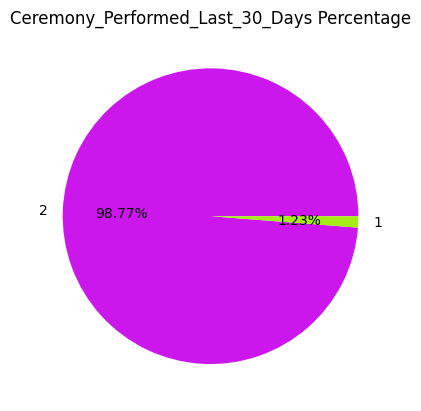

{'=========================================================================================='}


In [62]:
draw_pie('Ceremony_Performed_Last_30_Days')

## What’s the total number of Meals_Served_to_Non_HH_Members across all households?

In [79]:
non_hh_meal_count = pdf['Meals_Served_to_Non_HH_Members'].value_counts().to_pandas()

non_hh_meal_count = non_hh_meal_count.sort_values(by='count', ascending=False)
display(non_hh_meal_count)

,Meals_Served_to_Non_HH_Members,count
2,0,24969
4,2,4110
25,3,3381
34,4,3354
0,5,2010
33,6,1545
36,8,783
27,10,543
10,1,534
23,7,249


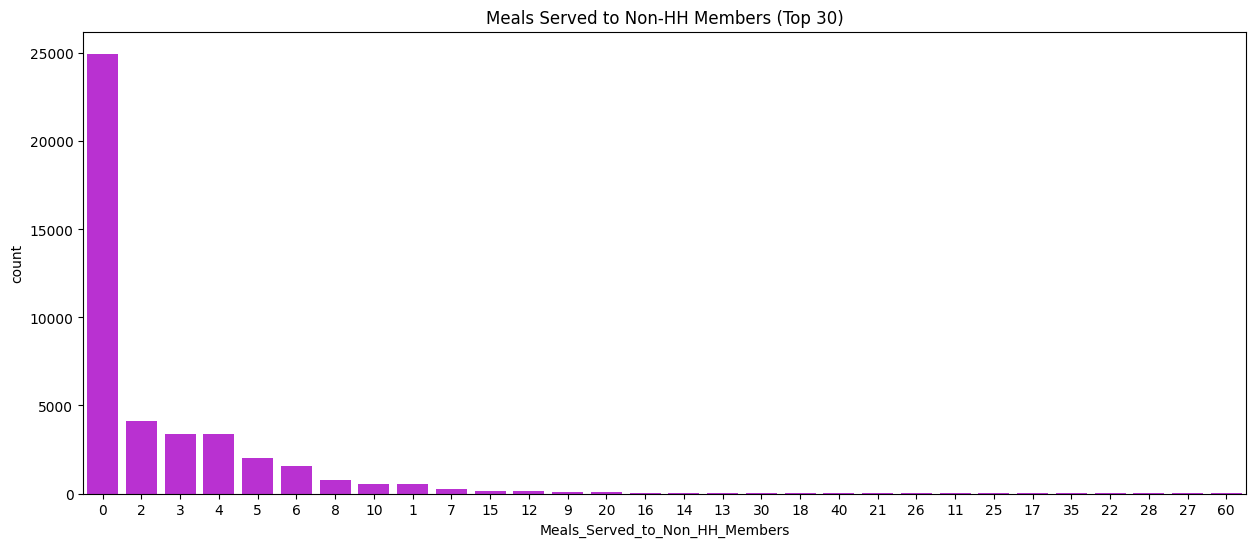

In [80]:
non_hh_meal_count = non_hh_meal_count.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=non_hh_meal_count.head(30),
    x='Meals_Served_to_Non_HH_Members',
    y='count',
    order=non_hh_meal_count.head(30)['Meals_Served_to_Non_HH_Members']  
)
plt.title('Meals Served to Non-HH Members (Top 30)')
plt.show()

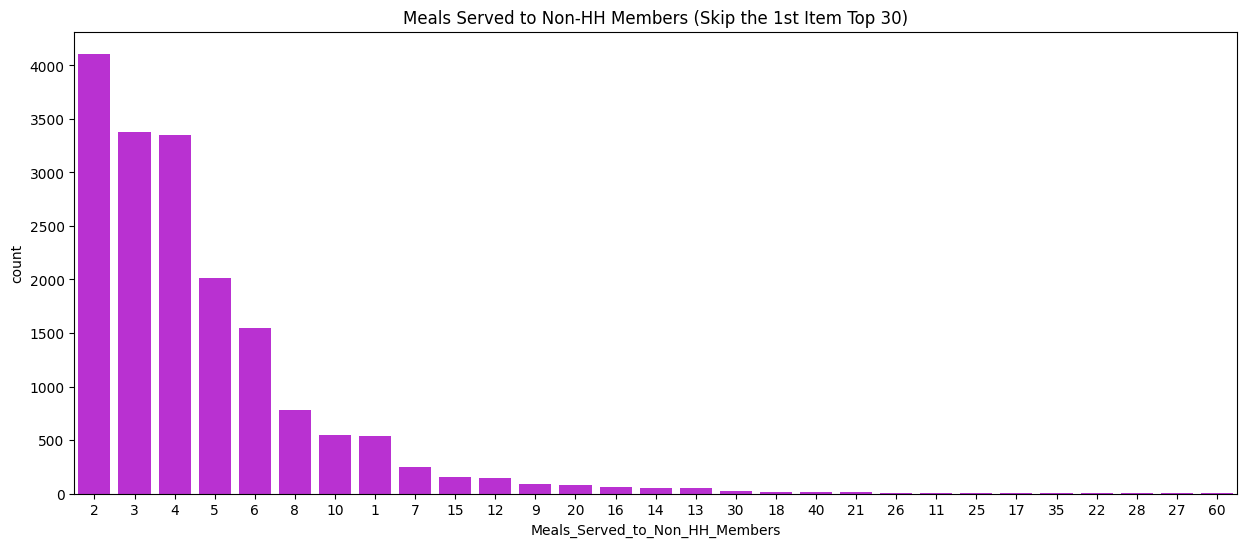

In [81]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=non_hh_meal_count.head(30),
    x='Meals_Served_to_Non_HH_Members',
    y='count',
    order=non_hh_meal_count.iloc[1:30]['Meals_Served_to_Non_HH_Members']  
)
plt.title('Meals Served to Non-HH Members (Skip the 1st Item Top 30)')
plt.show()

# 2. Comparative & Correlation Analysis

## Are households receiving rationed items also more or less likely to buy online groceries?

In [85]:
pdf.group_by('Ration_Any_Item_Last_30_Days').agg(
    pl.mean('Online_Groceries')
)

Ration_Any_Item_Last_30_Days,Online_Groceries
i32,f64
1,0.014997
2,0.057834


## Does receiving more Ration_Pulses or Ration_Rice correlate with fewer Online_Groceries purchases?

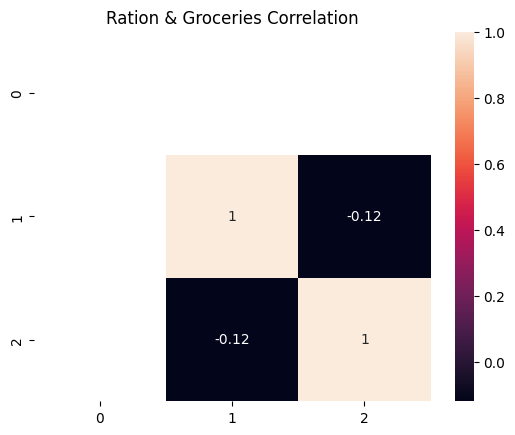

In [91]:
sns.heatmap(
    pdf['Ration_Pulses', 'Ration_Rice', 'Online_Groceries'].corr(),
    annot=True,
)
plt.title('Ration & Groceries Correlation')
plt.show()

## Do households that performed ceremonies have higher Meals_Served_to_Non_HH_Members?

In [93]:
pdf.group_by('Ceremony_Performed_Last_30_Days').agg(
    pl.mean('Meals_Served_to_Non_HH_Members')
)

Ceremony_Performed_Last_30_Days,Meals_Served_to_Non_HH_Members
i32,f64
1,27.45977
2,1.728088


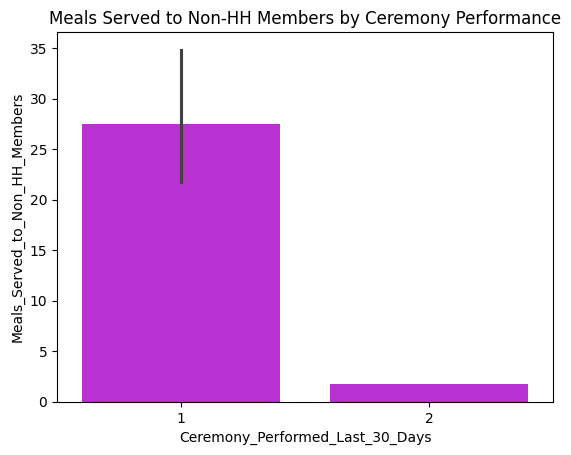

In [92]:
sns.barplot(
    data=pdf,
    x='Ceremony_Performed_Last_30_Days',
    y='Meals_Served_to_Non_HH_Members'
)
plt.title('Meals Served to Non-HH Members by Ceremony Performance')
plt.show()

## Which rationed item is most commonly distributed (rice, wheat, coarse grains)?

In [95]:
pdf[ration_col].sum()

Ration_Any_Item_Last_30_Days,Ration_Rice,Ration_Wheat,Ration_Coarse_Grain,Ration_Sugar,Ration_Pulses,Ration_Edible_Oil,Ration_Other_Food_Items
i32,i32,i32,i32,i32,i32,i32,i32
57825,26724,26529,0,738,0,0,24543


## On average, how many different ration items does each household receive?


In [124]:
ration_cols = ['Ration_Any_Item_Last_30_Days',
 'Ration_Rice',
 'Ration_Wheat',
 'Ration_Coarse_Grain',
 'Ration_Sugar',
 'Ration_Pulses',
 'Ration_Edible_Oil',
 'Ration_Other_Food_Items']

print('Sum of the Ration Values')
pdf[ration_cols].mean().to_pandas().T

Sum of the Ration Values


,0
Ration_Any_Item_Last_30_Days,1.366537
Ration_Rice,0.631549
Ration_Wheat,0.626941
Ration_Coarse_Grain,0.000000
Ration_Sugar,0.017441
Ration_Pulses,0.000000
Ration_Edible_Oil,0.000000
Ration_Other_Food_Items,0.580007


## Which Ration_ category* is most received?

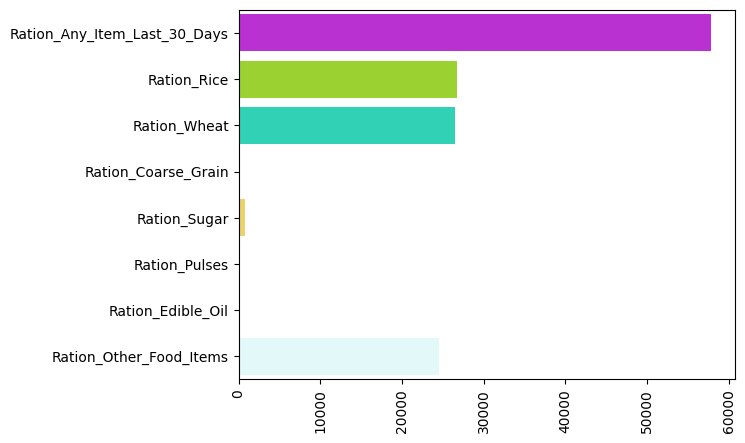

In [ ]:
sns.barplot(pdf[ration_col].sum().to_pandas(), orient='h')
plt.title('Ration Item Counts')
plt.xticks(rotation=90)
plt.show()

## Which Online_ category* (milk, fruits, processed food, etc.) is most popular overall?

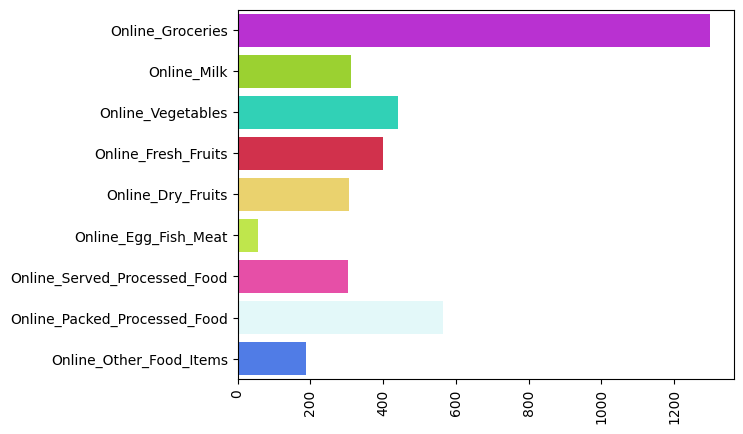

In [ ]:
sns.barplot(pdf[online_col].sum().to_pandas(), orient='h')
plt.title('Online Item Counts')
plt.xticks(rotation=90)
plt.show()

In [82]:
pdf.columns

['Meals_Served_to_Non_HH_Members',
 'Ceremony_Performed_Last_30_Days',
 'Online_Groceries',
 'Online_Milk',
 'Online_Vegetables',
 'Online_Fresh_Fruits',
 'Online_Dry_Fruits',
 'Online_Egg_Fish_Meat',
 'Online_Served_Processed_Food',
 'Online_Packed_Processed_Food',
 'Online_Other_Food_Items',
 'Ration_Any_Item_Last_30_Days',
 'Ration_Rice',
 'Ration_Wheat',
 'Ration_Coarse_Grain',
 'Ration_Sugar',
 'Ration_Pulses',
 'Ration_Edible_Oil',
 'Ration_Other_Food_Items']

,Meals_Served_to_Non_HH_Members,count
0,13,48
1,2,4110
2,23,3
3,12,150
4,0,24969
5,35,9
6,48,3
7,250,3
8,28,9
9,6,1545


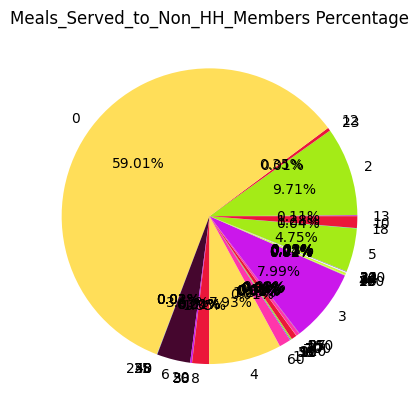

{'=========================================================================================='}


,Ceremony_Performed_Last_30_Days,count
0,2,41793
1,1,522


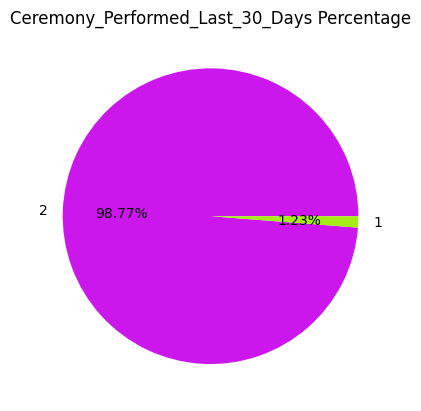

{'=========================================================================================='}


,Online_Groceries,count
0,1,1299
1,0,41016


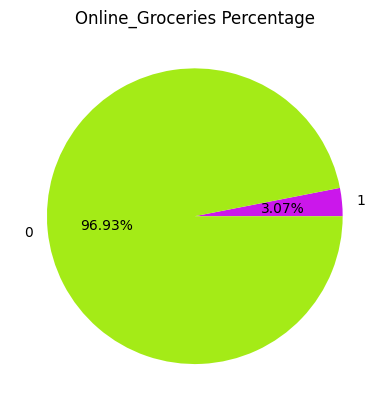

{'=========================================================================================='}


,Online_Milk,count
0,0,42003
1,1,312


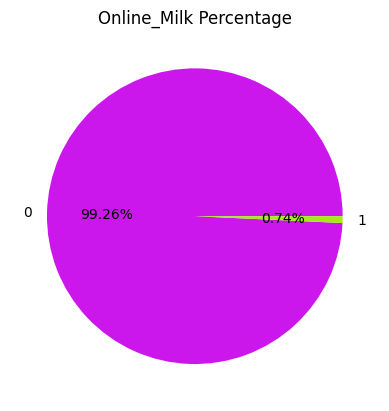

{'=========================================================================================='}


,Online_Vegetables,count
0,0,41874
1,1,441


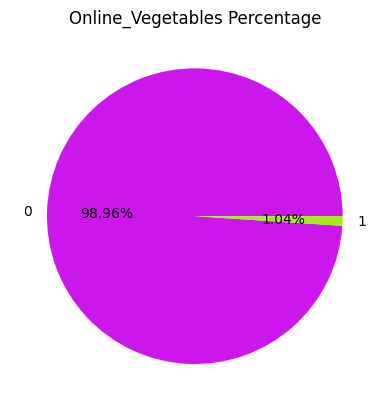

{'=========================================================================================='}


,Online_Fresh_Fruits,count
0,0,41916
1,1,399


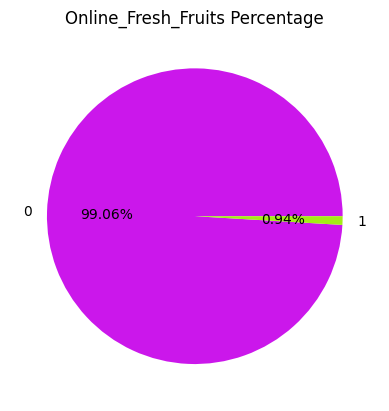

{'=========================================================================================='}


,Online_Dry_Fruits,count
0,0,42009
1,1,306


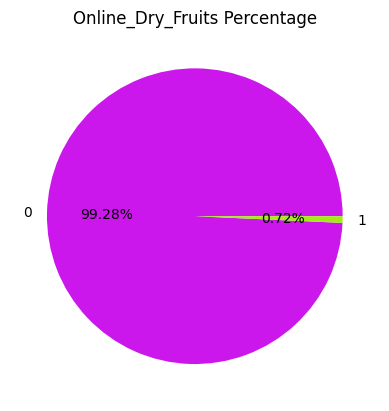

{'=========================================================================================='}


,Online_Egg_Fish_Meat,count
0,1,57
1,0,42258


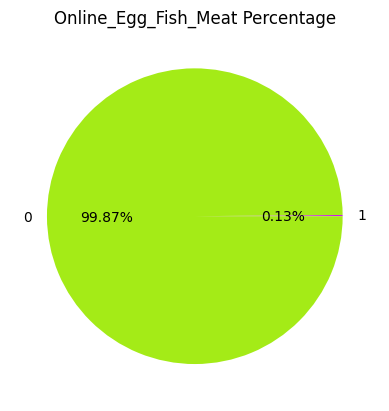

{'=========================================================================================='}


,Online_Served_Processed_Food,count
0,1,303
1,0,42012


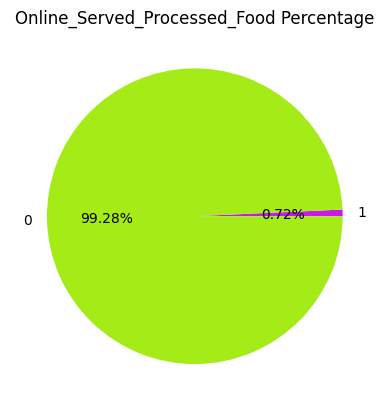

{'=========================================================================================='}


,Online_Packed_Processed_Food,count
0,0,41751
1,1,564


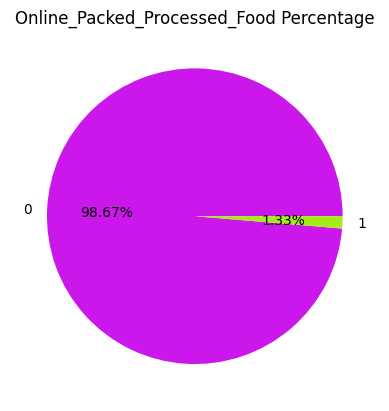

{'=========================================================================================='}


,Online_Other_Food_Items,count
0,0,42126
1,1,189


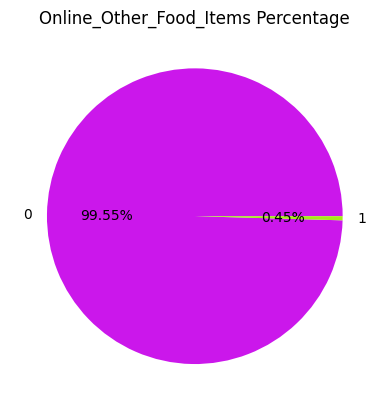

{'=========================================================================================='}


,Ration_Any_Item_Last_30_Days,count
0,2,15510
1,1,26805


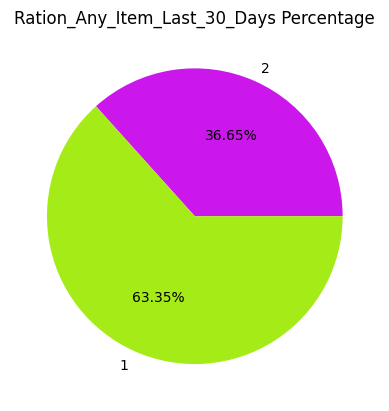

{'=========================================================================================='}


,Ration_Rice,count
0,0,15591
1,1,26724


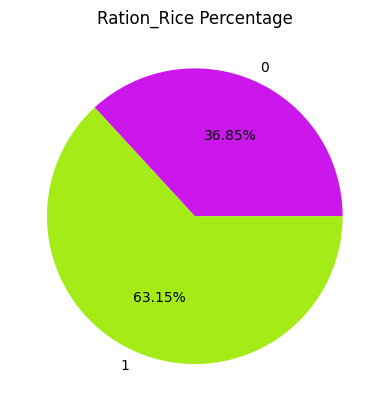

{'=========================================================================================='}


,Ration_Wheat,count
0,1,26529
1,0,15786


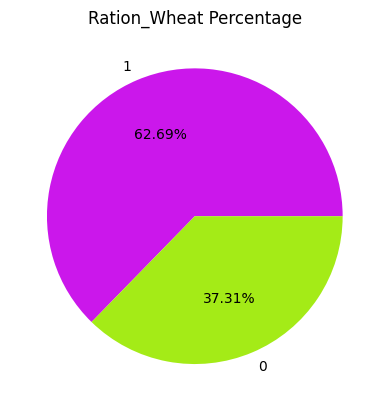

{'=========================================================================================='}


,Ration_Coarse_Grain,count
0,0,42315


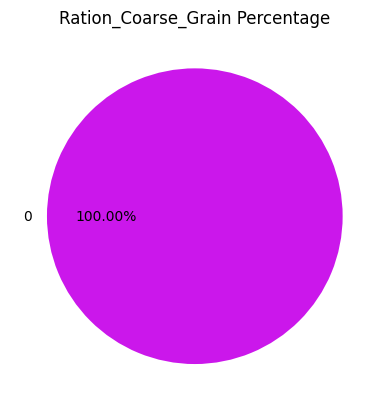

{'=========================================================================================='}


,Ration_Sugar,count
0,0,41577
1,1,738


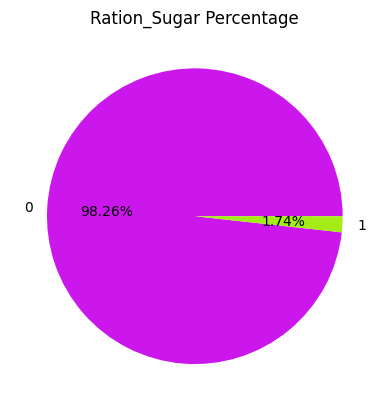

{'=========================================================================================='}


,Ration_Pulses,count
0,0,42315


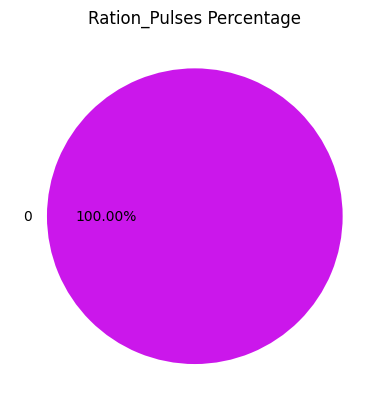

{'=========================================================================================='}


,Ration_Edible_Oil,count
0,0,42315


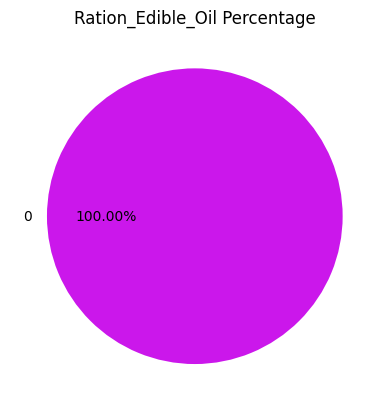

{'=========================================================================================='}


,Ration_Other_Food_Items,count
0,1,24543
1,0,17772


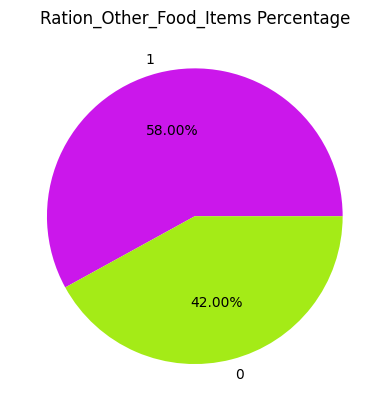

{'=========================================================================================='}


In [123]:
col_list = pdf.columns
for col in col_list:
    draw_pie(col)